# Clustering Fundamentals

## Learning Objectives
- Understand what clustering is and when to use it
- Apply K-means clustering
- Use hierarchical clustering
- Choose number of clusters with elbow method
- Evaluate clustering with silhouette score

## Introduction

**Clustering:** Grouping similar data points together

**Key Difference:** No labels! Algorithm finds structure itself.

**Applications:**
- Customer segmentation
- Document organization
- Image compression
- Anomaly detection

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
plt.style.use('default')
print('✓ Ready!')

✓ Ready!


## 1. What is Clustering?

**Goal:** Find groups of similar data points

**No labels:** Algorithm discovers structure

**Example:** Group customers by purchasing behavior

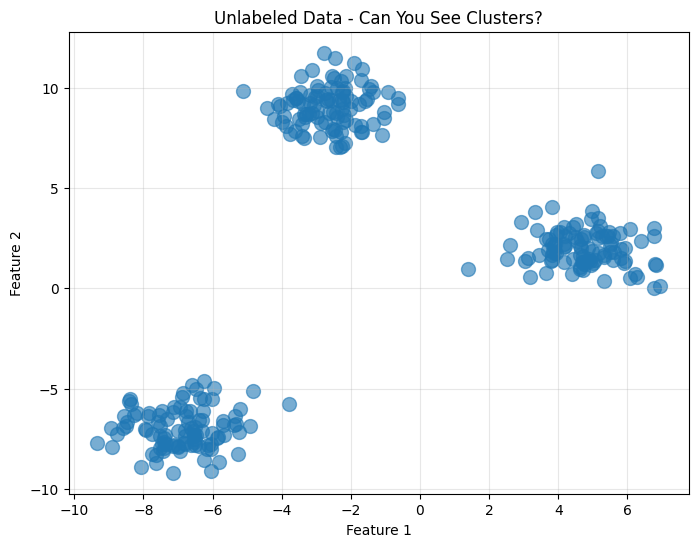

Data shape: (300, 2)
We see patterns, but no labels!


In [2]:
# Generate sample data with clear clusters
X, y_true = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, s=100)
plt.title('Unlabeled Data - Can You See Clusters?')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.show()

print('Data shape:', X.shape)
print('We see patterns, but no labels!')

## 2. K-Means Clustering

**Idea:** Find k cluster centers that minimize distance to points

**Algorithm:**
1. Randomly place k centers
2. Assign each point to nearest center
3. Move centers to mean of assigned points
4. Repeat steps 2-3 until convergence

**Simple and fast!**

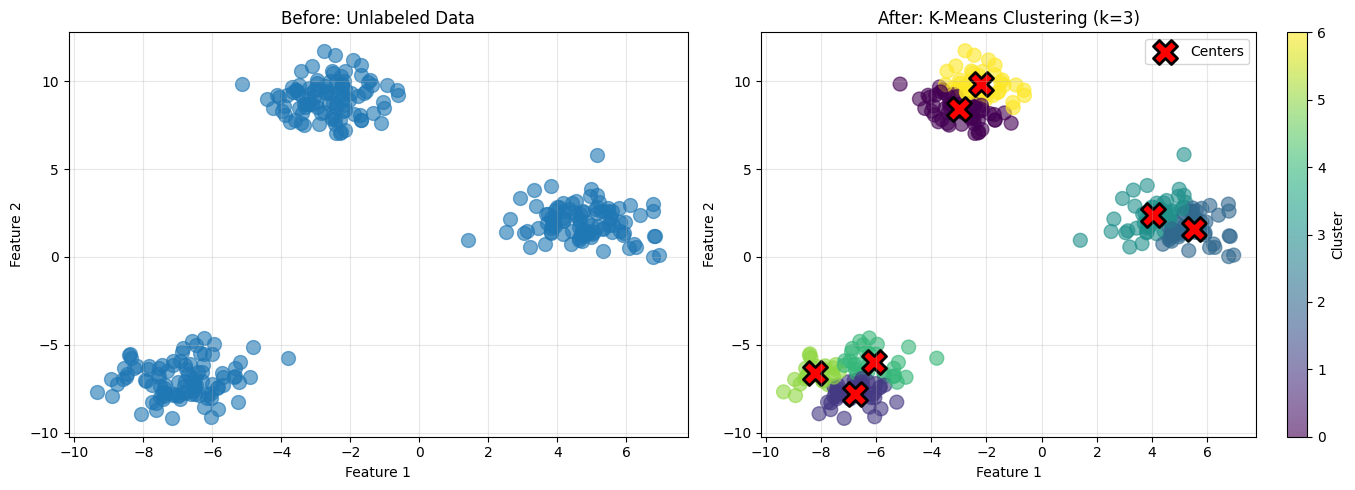

Cluster sizes: [55 48 49 51 29 23 45]
Inertia (sum of squared distances): 308.20


In [4]:
# Apply K-means
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
kmeans.fit(X)
y_pred = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original unlabeled data
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.6, s=100)
axes[0].set_title('Before: Unlabeled Data')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

# After K-means
scatter = axes[1].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.6, s=100)
axes[1].scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=300, 
               edgecolors='black', linewidths=2, label='Centers')
axes[1].set_title('After: K-Means Clustering (k=3)')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.colorbar(scatter, ax=axes[1], label='Cluster')
plt.tight_layout()
plt.show()

print(f'Cluster sizes: {np.bincount(y_pred)}')
print(f'Inertia (sum of squared distances): {kmeans.inertia_:.2f}')

## 3. Choosing the Number of Clusters

**Problem:** How many clusters (k) should we use?

**Elbow Method:**
- Try different k values
- Plot inertia (sum of squared distances)
- Look for "elbow" where improvement slows

**Rule of thumb:** Not always perfect, but helpful!

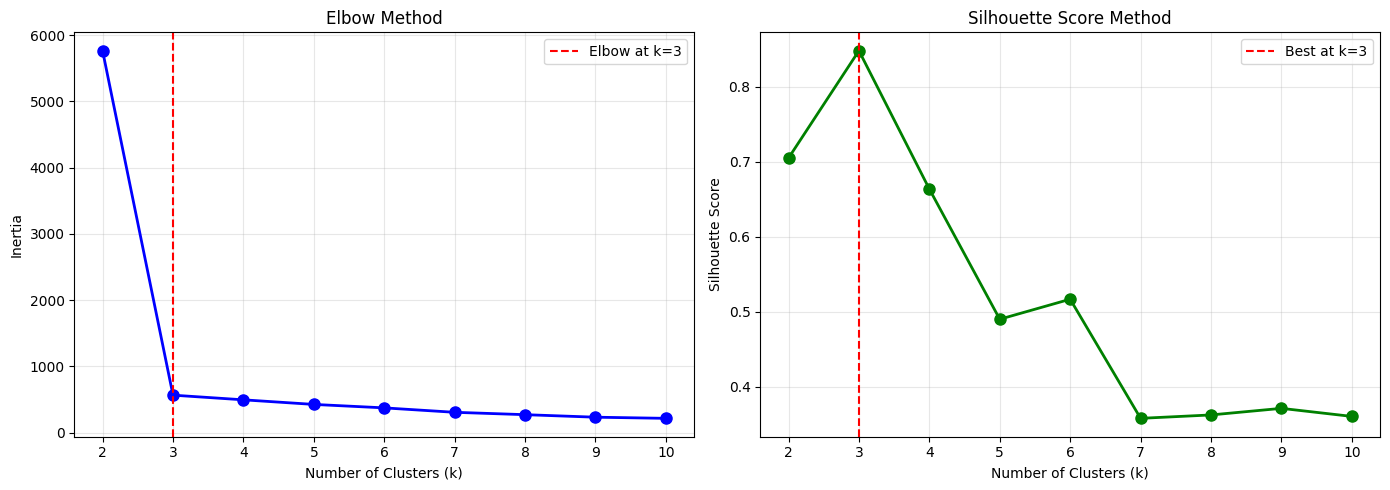

✓ Elbow suggests k=3
✓ Silhouette score highest at k=3


In [ ]:
# Elbow method
# (Within-Cluster Sum of Squares, WCSS
# Summe der quadrierten Abstände jedes Punktes zu seinem Cluster-Zentroid
# Je niedriger, desto kompakter die Cluster
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].axvline(x=3, color='red', linestyle='--', label='Elbow at k=3')
axes[0].grid(True, alpha=0.3)
axes[0].legend()


# Der Silhouette Score misst, wie gut ein Datenpunkt zu seinem Cluster passt und wie klar er von anderen Clustern getrennt ist.
# Silhouette plot
# Für jeden Datenpunkt i:
#a(i) = durchschnittlicher Abstand zu allen anderen Punkten im eigenen Cluster (Kohäsion)
#b(i) = durchschnittlicher Abstand zu allen Punkten im nächstgelegenen anderen Cluster (Trennung) 
#

axes[1].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score Method')
axes[1].axvline(x=3, color='red', linestyle='--', label='Best at k=3')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

print('✓ Elbow suggests k=3')
print('✓ Silhouette score highest at k=3')

## 4. Hierarchical Clustering

**Different approach:** Build tree of clusters

**Agglomerative (bottom-up):**
1. Start: Each point is its own cluster
2. Merge closest clusters
3. Repeat until one cluster

**Advantage:** See clustering at all levels
**Disadvantage:** Slower than K-means

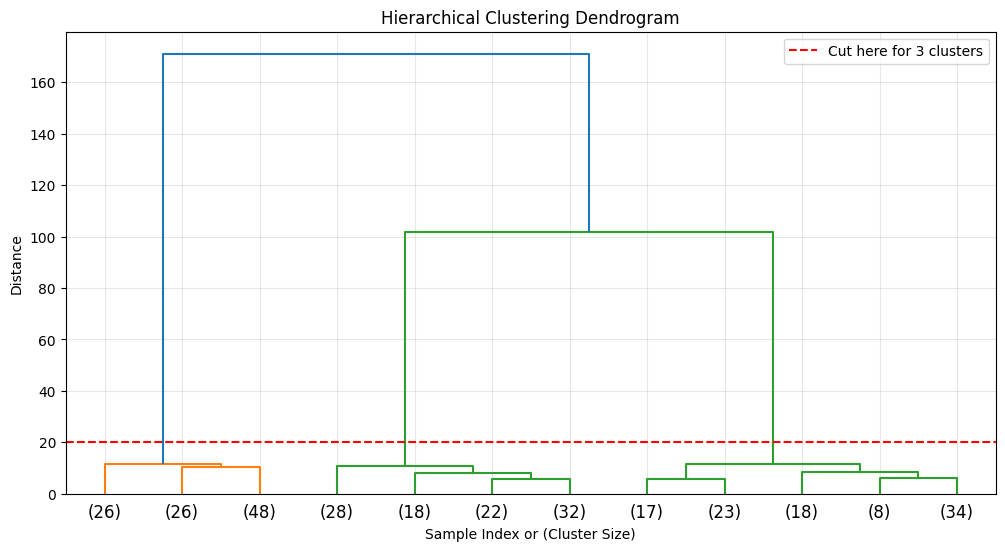


Dendrogram shows hierarchy of merges
Cut at different heights → different number of clusters


In [6]:
# Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute linkage
linkage_matrix = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.axhline(y=20, color='red', linestyle='--', label='Cut here for 3 clusters')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print('\nDendrogram shows hierarchy of merges')
print('Cut at different heights → different number of clusters')

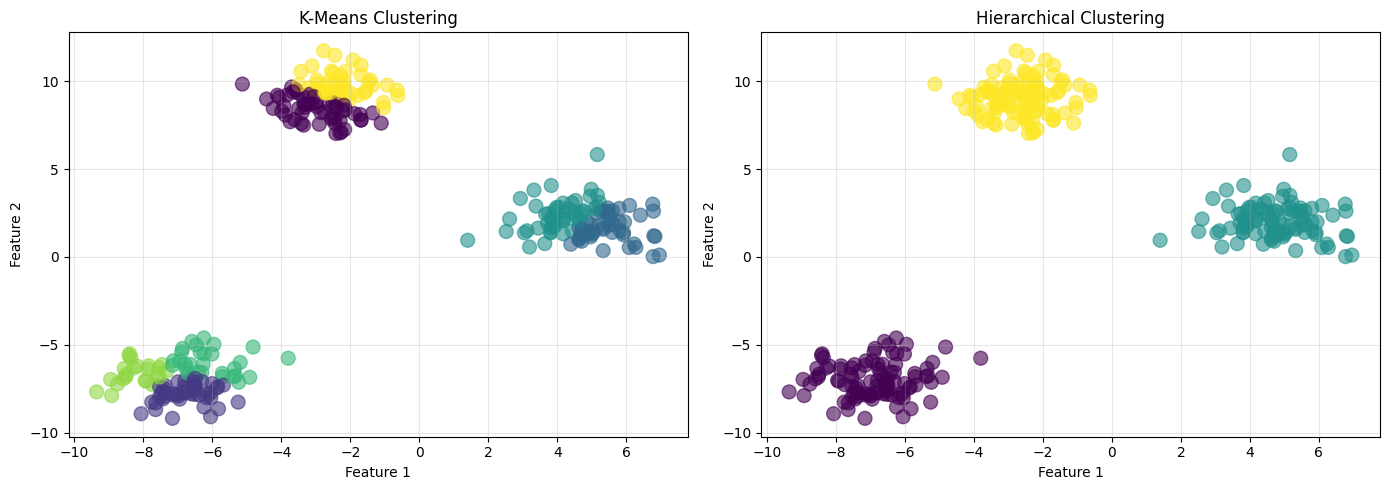

Results often similar for well-separated clusters


In [7]:
# Apply hierarchical clustering
hier = AgglomerativeClustering(n_clusters=3)
y_hier = hier.fit_predict(X)

# Compare with K-means
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.6, s=100)
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X[:, 0], X[:, 1], c=y_hier, cmap='viridis', alpha=0.6, s=100)
axes[1].set_title('Hierarchical Clustering')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('Results often similar for well-separated clusters')

## 5. Evaluating Clustering

**Challenge:** No ground truth labels!

**Internal Metrics:**
- **Silhouette Score:** [-1, 1], higher is better
- **Davies-Bouldin Index:** Lower is better
- **Inertia:** Lower is better (but depends on k)

**Also:** Visual inspection!

In [8]:
# Evaluate clustering
sil_score = silhouette_score(X, y_pred)
db_score = davies_bouldin_score(X, y_pred)

print('Clustering Evaluation:\n')
print(f'Silhouette Score: {sil_score:.3f} (closer to 1 is better)')
print(f'Davies-Bouldin Index: {db_score:.3f} (lower is better)')
print(f'Inertia: {kmeans.inertia_:.2f} (lower is better for same k)')

if sil_score > 0.5:
    print('\n✓ Good clustering quality!')
elif sil_score > 0.3:
    print('\n⚠️  Moderate clustering quality')
else:
    print('\n❌ Poor clustering quality')

Clustering Evaluation:

Silhouette Score: 0.358 (closer to 1 is better)
Davies-Bouldin Index: 1.005 (lower is better)
Inertia: 217.05 (lower is better for same k)

⚠️  Moderate clustering quality


## 6. Important Considerations

### Feature Scaling
**Critical for distance-based methods!**

K-means uses Euclidean distance → features on different scales dominate.

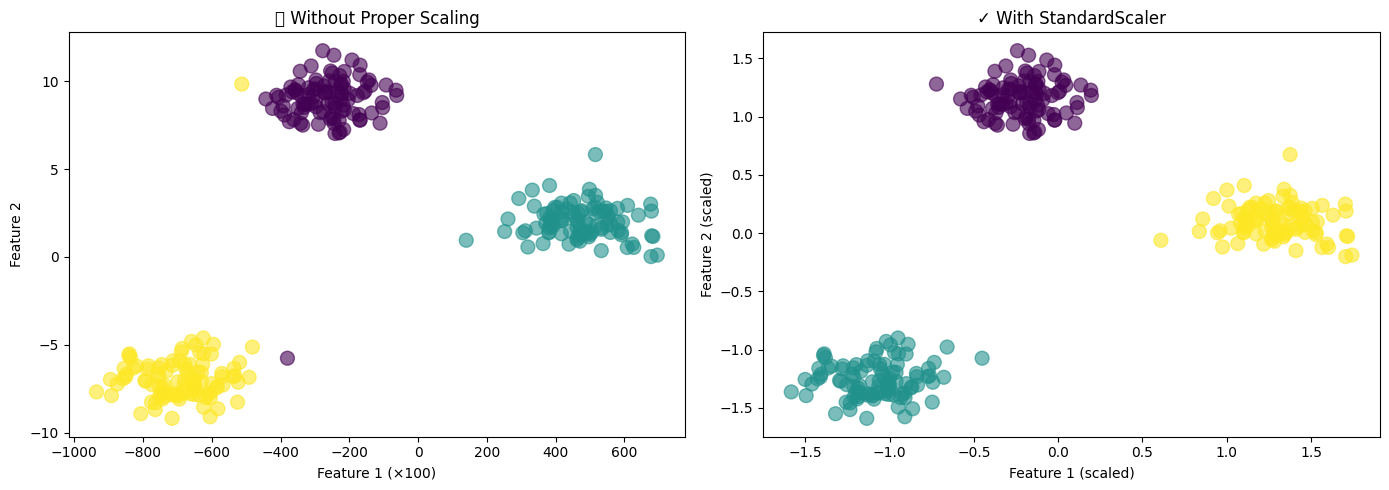

⚠️  Always scale features before clustering!


In [9]:
# Demonstrate importance of scaling
X_scaled = np.copy(X)
X_scaled[:, 0] *= 100  # Scale first feature way up

# Cluster without proper scaling
kmeans_unscaled = KMeans(n_clusters=3, random_state=42)
y_unscaled = kmeans_unscaled.fit_predict(X_scaled)

# Cluster with scaling
scaler = StandardScaler()
X_properly_scaled = scaler.fit_transform(X_scaled)
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
y_scaled = kmeans_scaled.fit_predict(X_properly_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_unscaled, cmap='viridis', alpha=0.6, s=100)
axes[0].set_title('❌ Without Proper Scaling')
axes[0].set_xlabel('Feature 1 (×100)')
axes[0].set_ylabel('Feature 2')

axes[1].scatter(X_properly_scaled[:, 0], X_properly_scaled[:, 1], c=y_scaled, cmap='viridis', alpha=0.6, s=100)
axes[1].set_title('✓ With StandardScaler')
axes[1].set_xlabel('Feature 1 (scaled)')
axes[1].set_ylabel('Feature 2 (scaled)')

plt.tight_layout()
plt.show()

print('⚠️  Always scale features before clustering!')

## Summary

### Key Takeaways:

1. **Clustering finds groups without labels**
2. **K-means:** Fast, assumes spherical clusters
3. **Hierarchical:** Shows all levels, slower
4. **Choose k:** Elbow method, silhouette score, domain knowledge
5. **Evaluation:** Silhouette score, Davies-Bouldin, visual inspection
6. **Always scale features** for distance-based methods

### When to Use:
- **K-means:** Large datasets, spherical clusters
- **Hierarchical:** Small datasets, want hierarchy

### Next Steps:
Learn DBSCAN for non-spherical clusters!

## Exercises

In [ ]:
# Exercise 1: Apply K-means to Iris dataset
# TODO: Load iris, scale features, find optimal k, cluster

# Your code here


In [ ]:
# Exercise 2: Compare K-means with different k values
# TODO: Try k=2,3,4,5 and visualize all

# Your code here


In [ ]:
# Exercise 3: Implement elbow method from scratch
# TODO: Loop over k, store inertias, plot

# Your code here
